## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [13]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [7]:
# 設定 data_path
dir_data = '/Users/rogeredc/Documents/GitHub/ML100-Days-講義/part1/data'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [8]:
app_train["equal_width_Years_EMPLOYED"]=app_train['DAYS_EMPLOYED']/-360

In [9]:
app_train["equal_width_Years_EMPLOYED"] = pd.cut(app_train["equal_width_Years_EMPLOYED"], 10)

In [10]:
app_train["equal_width_Years_EMPLOYED"].value_counts()

(-0.0498, 4.976]    134392
(4.976, 9.951]       65188
(9.951, 14.927]      27932
(14.927, 19.902]     11382
(19.902, 24.878]      6563
(24.878, 29.853]      3387
(29.853, 34.829]      2027
(34.829, 39.804]       955
(39.804, 44.78]        261
(44.78, 49.756]         50
Name: equal_width_Years_EMPLOYED, dtype: int64

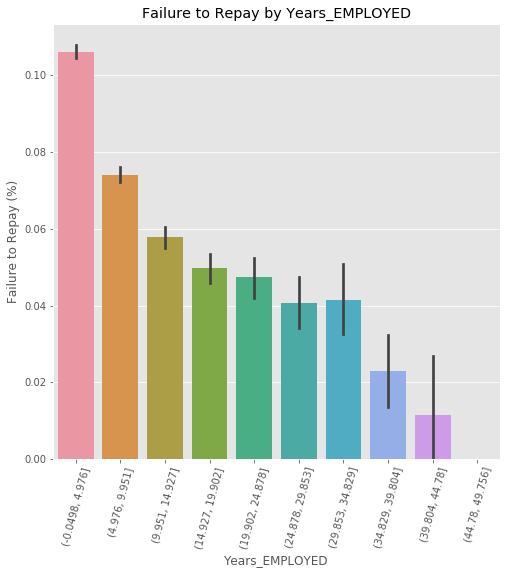

In [17]:
plt.figure(figsize = (8, 8))
px = app_train["equal_width_Years_EMPLOYED"]
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('Years_EMPLOYED'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Years_EMPLOYED');

In [18]:
app_train['qcut_AMT_INCOME_TOTAL'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)

In [19]:
app_train['qcut_AMT_INCOME_TOTAL'].value_counts()

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: qcut_AMT_INCOME_TOTAL, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


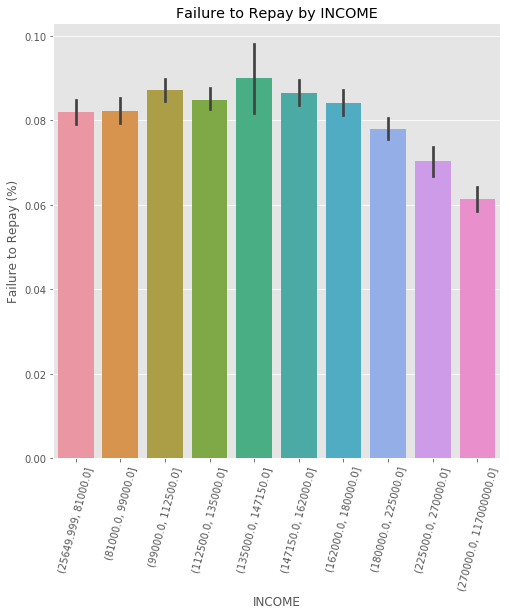

In [21]:
plt.figure(figsize = (8, 8))
px = app_train['qcut_AMT_INCOME_TOTAL']
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('INCOME'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by INCOME');